## Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3

### Μέλη Ομάδας
Ον/μο1: Θεόδωρος Αράπης

Αρ. Μητρώου 1: el18028

Oν/μο2: Εμμανουήλ Βλάσσης

Αρ. Μητρώου 2: el18086

## 1ο μέρος

In [40]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
        y_true = self.y_true
        y_pred = self.y_pred

        ##################
        ## Your code below
        count = 0
        for i in range(0, len(y_true)):
            if y_true[i] == y_pred[i]:
                count += 1
        acc = count/len(y_true)
        ## Your code above
        ##################
        return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

In [41]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


In [42]:
import pandas as pd
from tqdm.notebook import tqdm 

# read data in the form of pandas DataFrame
data = pd.read_csv("music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [43]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [85]:
from sklearn.utils import shuffle

# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# Ανακατεύουμε τα δεδομένα για να μην παίρνουμε πάντα το ίδιο 70% για το train set
data = shuffle(data)

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test_list, y_test_list, x_train_list, y_train_list = [], [], [], []
##################
## Your code below
train_size = int(len(data.index)*0.7)
count = 0
for row in data.itertuples(index=False):
    count += 1
    id = getattr(row, 'instance_id')
    genre = getattr(row, 'music_genre')
    # print(int(id))
    temp = []
    for field in row._fields:
        if (field == 'instance_id' or field == 'music_genre'):
            continue
        elif (field in inputs):
            temp.append(getattr(row, field))
    if (count <= train_size):
        x_train_list.append(temp)
        y_train_list.append(genres_to_id[genre])
    else:
        x_test_list.append(temp)
        y_test_list.append(genres_to_id[genre])

# Μετατρέπουμε τις λίστες λιστών σε numpy 2D arrays
x_train = np.array(x_train_list)
y_train = np.array(y_train_list)
x_test = np.array(x_test_list)
y_test = np.array(y_test_list)
# print(str(x_train))
# print(str(x_test))
## Your code above
##################

In [86]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
print("Ο αριθμός των γραμμών (αριθμός στοιχείων) του x_train είναι: " + str(len(x_train)))
print("Ο αριθμός των στηλών του x_train είναι: " + str(len(x_train[0])))
print("Ο αριθμός των γραμμών (αριθμός στοιχείων) του x_test είναι: " + str(len(x_test)))
print("Ο αριθμός των στηλών του x_test είναι: " + str(len(x_test[0])))

print("Ο αριθμός των γραμμών (αριθμός στοιχείων) του y_train είναι: " + str(len(y_train)))
if (y_train.ndim == 1): 
    print("Ο αριθμός των στηλών του y_train είναι: 1 (επειδή είναι μονοδιάστατος πίνακας)")
print("Ο αριθμός των γραμμών (αριθμός στοιχείων) του y_test είναι: " + str(len(y_test)))
if (y_test.ndim == 1):
    print("Ο αριθμός των στηλών του y_test είναι: 1 (επειδή είναι μονοδιάστατος πίνακας)")
## Your code above
##################

Ο αριθμός των γραμμών (αριθμός στοιχείων) του x_train είναι: 9471
Ο αριθμός των στηλών του x_train είναι: 6
Ο αριθμός των γραμμών (αριθμός στοιχείων) του x_test είναι: 4060
Ο αριθμός των στηλών του x_test είναι: 6
Ο αριθμός των γραμμών (αριθμός στοιχείων) του y_train είναι: 9471
Ο αριθμός των στηλών του y_train είναι: 1 (επειδή είναι μονοδιάστατος πίνακας)
Ο αριθμός των γραμμών (αριθμός στοιχείων) του y_test είναι: 4060
Ο αριθμός των στηλών του y_test είναι: 1 (επειδή είναι μονοδιάστατος πίνακας)


In [87]:
# Range of x_train, x_test columns

##################
## Your code below
max = [x_train[0][i] for i in range(len(x_train[0]))]
min = [x_train[0][i] for i in range(len(x_train[0]))]
for element in x_train:
    for i in range(len(element)):
        if element[i] > max[i]:
            max[i] = element[i]
        if element[i] < min[i]:
            min[i] = element[i]
print("Max του x_train: " + str(max))
print("Min του x_train: " + str(min))

max = [x_test[0][i] for i in range(len(x_test[0]))]
min = [x_test[0][i] for i in range(len(x_test[0]))]
for element in x_test:
    for i in range(len(element)):
        if element[i] > max[i]:
            max[i] = element[i]
        if element[i] < min[i]:
            min[i] = element[i]
print("Max του x_test: " + str(max))
print("Min του x_test: " + str(min))
## Your code above
##################

Max του x_train: [0.994, 0.977, 0.998, 0.986, 0.989, 0.922]
Min του x_train: [1.39e-06, 0.0822, 0.0231, 0.0, 0.0173, 0.0224]
Max του x_test: [0.994, 0.973, 0.999, 0.974, 0.991, 0.883]
Min του x_test: [4.94e-06, 0.0645, 0.00259, 0.0, 0.0194, 0.0231]


## 2ο Μέρος: Υλοποίηση ΚΝΝ

In [88]:
from numpy import linalg
from collections import Counter
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      if self.distance=='euclidean':
        ##################
        ## Your code below
        dist = np.linalg.norm(row1 - row2)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 - (np.dot(row1, row2) / (np.linalg.norm(row1) * np.linalg.norm(row2)))
        ## Your code above
        ##################

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for i in x:
        distances.append(self.get_distance(i, row))
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below
      freq = Counter(nn_labels)
      prediction, _ = freq.most_common(1)[0]
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidean')

In [89]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]
print(labels)
print(preds)

[2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2]
[2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2]


### Αξιολόγηση του δικού μας KNN

In [90]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7446792732665924
recall: 0.7418137418137419
f1: 0.731453871871329
accuracy: 0.73
Confusion matrix: 
[[25 10  4]
 [ 3 24  1]
 [ 3  6 24]]


### Έτοιμος KNN classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7449217449217449
recall: 0.7384559884559886
f1: 0.7318915441009887
accuracy: 0.73
Confusion matrix: 
[[26 10  3]
 [ 4 23  1]
 [ 3  6 24]]


In [92]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7446792732665924
recall: 0.7418137418137419
f1: 0.731453871871329
accuracy: 0.73
Confusion matrix: 
[[25 10  4]
 [ 3 24  1]
 [ 3  6 24]]
CPU times: user 3.2 s, sys: 2.62 ms, total: 3.21 s
Wall time: 3.2 s


In [93]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

eval = Evaluate(labels, preds)
eval.get_evaluation_report()


precision: 0.7363459399332591
recall: 0.7299089799089801
f1: 0.7216499503027016
accuracy: 0.72
Confusion matrix: 
[[25 11  3]
 [ 3 23  2]
 [ 3  6 24]]
CPU times: user 6.27 s, sys: 0 ns, total: 6.27 s
Wall time: 6.27 s


In [94]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7449217449217449
recall: 0.7384559884559886
f1: 0.7318915441009887
accuracy: 0.73
Confusion matrix: 
[[26 10  3]
 [ 4 23  1]
 [ 3  6 24]]
CPU times: user 16.9 ms, sys: 0 ns, total: 16.9 ms
Wall time: 15.3 ms


In [95]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7449217449217449
recall: 0.7384559884559886
f1: 0.7318915441009887
accuracy: 0.73
Confusion matrix: 
[[26 10  3]
 [ 4 23  1]
 [ 3  6 24]]
CPU times: user 3.41 s, sys: 830 µs, total: 3.41 s
Wall time: 3.4 s


In [96]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7661723123088464
recall: 0.7583805083805085
f1: 0.7416328096785844
accuracy: 0.74
Confusion matrix: 
[[22 13  4]
 [ 3 25  0]
 [ 1  5 27]]
CPU times: user 6.15 s, sys: 0 ns, total: 6.15 s
Wall time: 6.14 s


In [77]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6362756598240469
recall: 0.6190476190476191
f1: 0.6188028867215419
accuracy: 0.62
Confusion matrix: 
[[19  7  9]
 [ 6 25  4]
 [ 0 12 18]]
CPU times: user 13.6 ms, sys: 449 µs, total: 14.1 ms
Wall time: 12.8 ms


### Σχολιασμός
Επίδοση: Η επίδοση είναι πολύ κοντά με αυτήν της έτοιμης υλοποίησης της βιβλιοθήκης sklearn. 

Χρόνος Εκτέλεσης: Η δική μας υλοποίηση χρειάζεται περίπου 2 τάξεις μεγέθους (x 100) περισσότερο χρόνο από την έτοιμη υλοποίηση. Οι συναρτήσεις που πιθανώς αργούν την υλοποίηση είναι οι argsort και Counter. Η υλοποίηση με την απόσταση συνημητόνου χρειάζεται περίπου διπλάσιο χρόνο από την υλοποίηση με την Ευκλείδεια απόσταση.

Επίδραση συνάρτησης απόστασης: Δεν φαίνεται να υπάρχει σημαντική διαφορά στα αποτελέσματα ανάμεσα στις υλοποιήσεις με Ευκλείδεια απόσταση και απόσταση συνημητόνου. Η διαφορά είναι μικρότερη από 1-2% και εξαρτάται κάθε φορά από την είσοδο.

Επίδραση παραμέτρου k: Δε βλέπουμε σημαντική βελτίωση της επίδοσης με τη χρήση k = 50 αντί για k = 5 (μικρότερη από 5%). Αυτό εξηγείται πιθανώς επειδή έχουμε ήδη λαμβάνουμε υπόψη τα πιο κοντινά διανύσματα για k = 5, οπότε τα υπόλοιπα θα παίζουν μικρότερο ρόλο. Επίσης, παρατηρούμε ότι ο χρόνος εκτέλεσης δεν αλλάζει, το οποίο είναι λογικό καθώς εμείς ούτως ή άλλως κάνουμε ταξινόμηση όλων των αποστάσεων.

## 3ο Μέρος: Naive Bayes

In [58]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)
# np.set_printoptions(threshold=np.inf)
# print(x_train_r)
# np.set_printoptions(threshold=np.inf)
# print(x_train)

In [59]:
# pC = p(i)
# pxC = p(x | i)
# pcX = p(i | x)
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        for i in range(self.x.shape[0]):
            for j in range(self.x.shape[1]):
                    self.pxC[j, self.y[i]] += self.x[i, j]
        for i in range(self.pxC.shape[0]):
            for j in range(self.pxC.shape[1]):
                self.pxC[i, j] /= self.y.shape[0] * self.pC[j]
        #print(self.pxC)
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
            for x_i in range(xsize):
                if x[x_i] == 1:
                    pcX[i] *= self.pxC[x_i, i]*self.pC[i]
                elif x[x_i] == 0:
                    pcX[i] *= (1 - self.pxC[x_i, i])*self.pC[i]
          ## Your code above
          ##################
        return np.argmax(pcX)

### Αξιολόγηση του Naive Bayes

In [60]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.6207017543859649
recall: 0.5634920634920635
f1: 0.5602348269014935
accuracy: 0.57
Confusion matrix: 
[[16 11  8]
 [ 3 28  4]
 [ 0 17 13]]


### Έτοιμος Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6421095008051529
recall: 0.6015873015873016
f1: 0.5945902067495359
accuracy: 0.6
Confusion matrix: 
[[15 10 10]
 [ 2 26  7]
 [ 1 10 19]]


In [62]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 150 ms, sys: 249 µs, total: 151 ms
Wall time: 150 ms


In [63]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 3.15 ms, sys: 0 ns, total: 3.15 ms
Wall time: 2.48 ms


### Σύγκριση υλοποιήσεων
Η υπόθεση ότι τα δεδομένα ακολουθούν κανονική κατανομή είναι πολύ πιθανό να μην ισχύει (π.χ. τα περισσότερα τραγούδια να είναι acousticness γύρω στο 1).

### Σχολιασμός 3ου μέρους
Επίδοση: Η επίδοση της υλοποίησής μας είναι αρκετά κοντά στην έτοιμη υλοποίηση αν και λίγο χειρότερη (περίπου 1-2%).

Χρόνος εκτέλεσης: Όπως και στο 2ο μέρος, η δική μας υλοποίηση είναι περίπου 2 τάξης μεγέθους πιο αργή από την υλοποίηση της βιβλιοθήκης sklearn.

## 4o Μέρος: Multi-Layer Perceptron

In [64]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

In [65]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

In [66]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot
        output = np.dot(input, self.weights) + self.biases
    
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

In [67]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

In [68]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])] 
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            input = l.forward(input)
            activations.append(input)
            ## Your code above
            ##################
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

Epoch 0
Train accuracy: 0.1014676380530039
Val accuracy: 0.09753694581280788


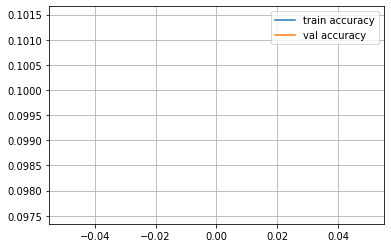

Epoch 1
Train accuracy: 0.353394572906768
Val accuracy: 0.34285714285714286


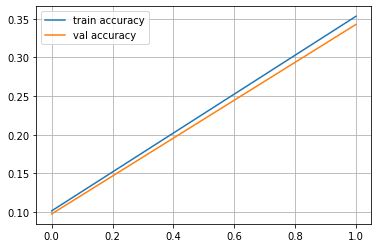

Epoch 2
Train accuracy: 0.33914053426248547
Val accuracy: 0.33399014778325126


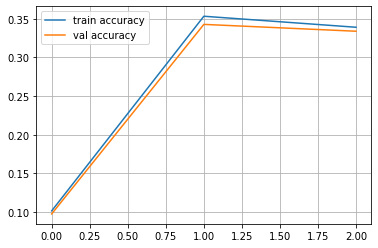

Epoch 3
Train accuracy: 0.336289726533629
Val accuracy: 0.3315270935960591


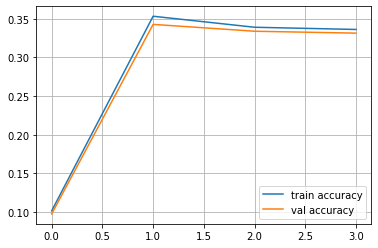

Epoch 4
Train accuracy: 0.3349171154049203
Val accuracy: 0.33078817733990146


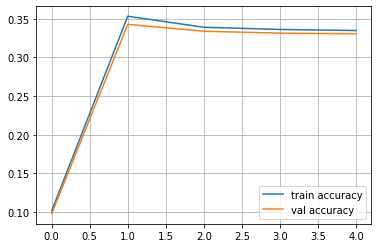

Epoch 5
Train accuracy: 0.33470594446204205
Val accuracy: 0.33029556650246306


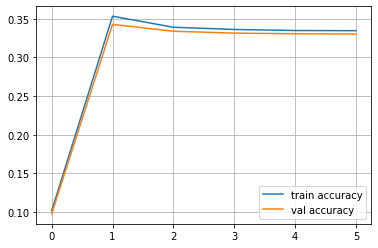

Epoch 6
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


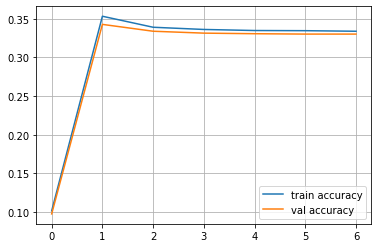

Epoch 7
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


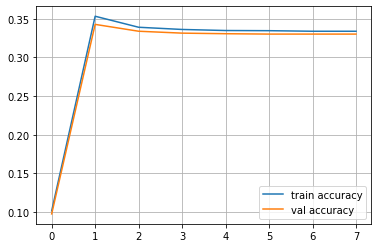

Epoch 8
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


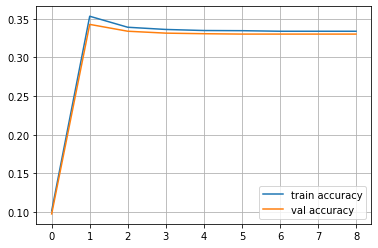

Epoch 9
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


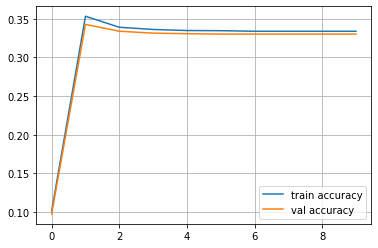

Epoch 10
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


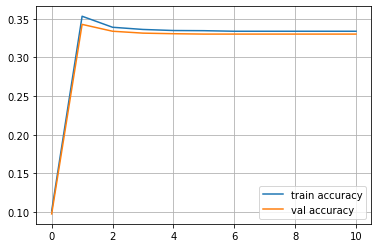

Epoch 11
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


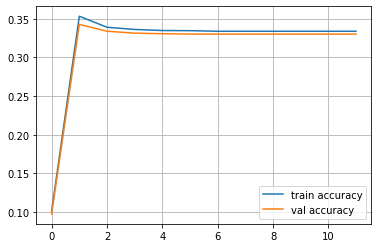

Epoch 12
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


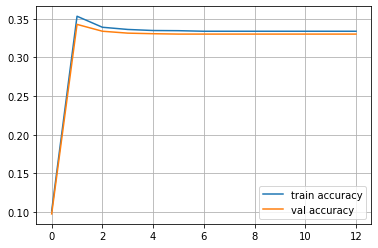

Epoch 13
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


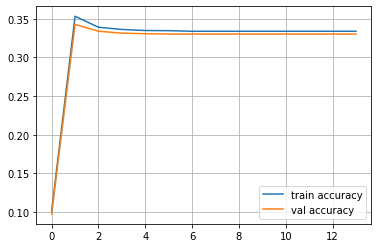

Epoch 14
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


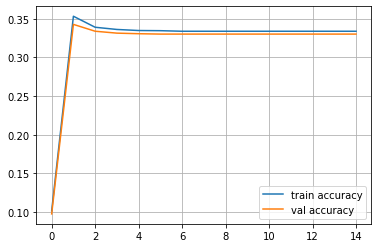

Epoch 15
Train accuracy: 0.3339668461619681
Val accuracy: 0.33029556650246306


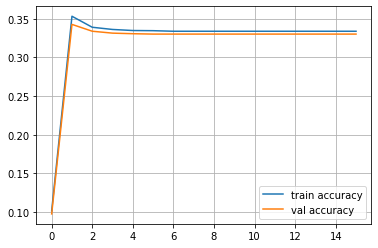

Epoch 16
Train accuracy: 0.3342836025762855
Val accuracy: 0.33029556650246306


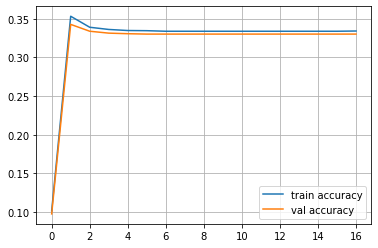

Epoch 17
Train accuracy: 0.4363847534579242
Val accuracy: 0.42266009852216746


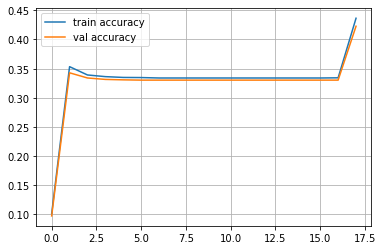

Epoch 18
Train accuracy: 0.5048041389504804
Val accuracy: 0.4970443349753695


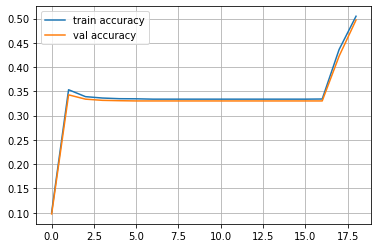

Epoch 19
Train accuracy: 0.5460880582831802
Val accuracy: 0.5381773399014779


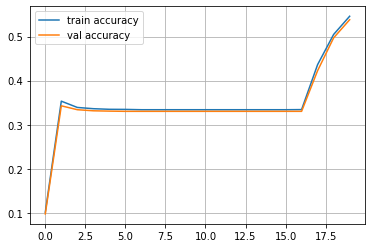

Epoch 20
Train accuracy: 0.5723788406715236
Val accuracy: 0.5630541871921182


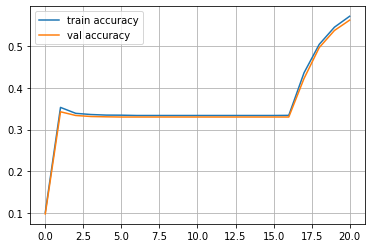

Epoch 21
Train accuracy: 0.5892725161017844
Val accuracy: 0.5807881773399015


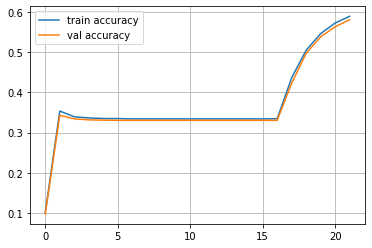

Epoch 22
Train accuracy: 0.6028930419174322
Val accuracy: 0.5963054187192118


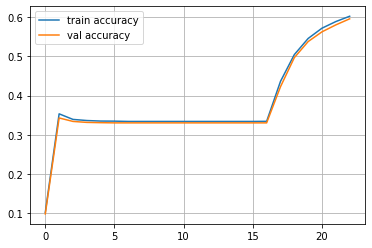

Epoch 23
Train accuracy: 0.6134515890613451
Val accuracy: 0.6078817733990147


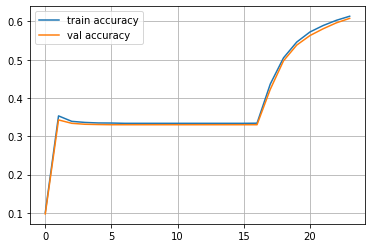

Epoch 24
Train accuracy: 0.6207369865906451
Val accuracy: 0.6123152709359606


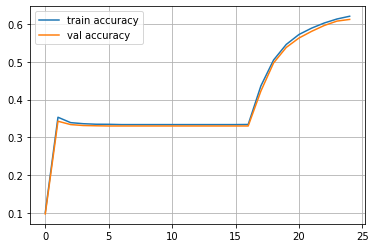

precision: 0.6742874687293758
recall: 0.6133768231004358
f1: 0.6078153865925485
accuracy: 0.6123152709359606
Confusion matrix: 
[[ 642  145  565]
 [ 114  692  561]
 [  15  174 1152]]


In [82]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 50, 50, 30], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

### Έτοιμο Multi-Layer Perceptron

In [84]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 50, 30), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7562129058851798
recall: 0.7442099303457016
f1: 0.744591797968894
accuracy: 0.7443349753694581
Confusion matrix: 
[[ 880  303  169]
 [ 149 1098  120]
 [  40  257 1044]]


/home/manos/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


### Σύγκριση υλοποιήσεων 3ου μέρους
Αρχικά, παρατηρήσαμε αμέσως ότι ο αριθμός των input sizes σε κάθε επίπεδο κάνει μεγάλη διαφορά στο τελικό αποτέλεσμα. Ενώ για τα input sizes [10, 15, 20, 3] το MLP έχει χαμηλά precision, recall, και f1 (περίπου 0.4), αυξάνοντας τις τιμές σε [100, 50, 50, 30] το αποτέλεσμα βελτιώθηκε γύρω στο 50%.

Επίδοση: Η επίδοση της έτοιμης υλοποίησης είναι αρκετά καλύτερη από τη δική μας υλοποίηση (περίπου κατά 10-20%).

Χρόνος εκτέλεσης: Η δική μας υλοποίηση είναι περίπου 2 φορές πιο αργή από την έτοιμη υλοποίηση της sklearn.


## Αξιολόγηση - Συμπεράσματα
### Σχολιασμός αποτελεσμάτων
Τις καλύτερες τιμές precision, recall, f1, και accuracy μας δίνει πάντα το Multi-Layer Perceptron, και στη δική μας και στην έτοιμη υλοποίηση. Τα επόμενα καλύτερα αποτελέσματα δίνει ο αλγόριθμος KNN για υψηλά k, και τα συγκριτικά χειρότερα αποτελέσματα δίνει ο Naive Bayes.

### Σχολιασμός χρόνων εκτέλεσης
Ο αλγόριθμος Naive Bayes τρέχει σημαντικά γρηγορότερα από τους άλλους 2 ταξινομητές, τουλάχιστον στη δική μας υλοποίηση. Ο πιο αργός ήταν το Multi-Layer Perceptron με 25 εποχές, ενώ ο ταξινομητής ΚΝΝ είχε περίπου τον ίδιο χρόνο ανεξάρτητα από το k (λόγω του τρόπου υλοποίησης).

### Γενικές Παρατηρήσεις
Παρατηρήσαμε ότι μερικές φορές η δική μας υλοποίηση MLP εμφάνιζε σε μια εποχή χειρότερα αποτελέσματα από την αμέσως προηγούμενη. Θα πρέπει να υπάρχει ένας ικανοποιητικός αριθμός εποχών ώστε να μειώνεται η πιθανότητα να συμβαίνει κάτι τέτοιο.

Το MLP έχει πολλή ευελιξία ως προς τις παραμέτρους (αριθμός layers, αριθμός εποχών ή συνθήκη τερματισμού, βήμα εκπαίδευσης, αρχικά διανύσματα) σε σχέση με ετους άλλους δύο αλγορίθμος.

Εκτελώντας πολλές φορές το ίδιο πρόγραμμα παρατηρήσαμε ότι υπήρχαν σημαντικές διαφορές στις επιδόσεις των αλγορίθμων από εκτέλεση σε εκτέλεση. Αυτό εξηγείται επειδή ελέγχουμε έναν σχετικά μικρό αριθμό από inputs (100).
